<h4>Useful Links</h4>
<ul>
<li>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html#sklearn.decomposition.IncrementalPCA">Incremental PCA</a></li>
<li><a href="https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/">PCA Implementation</a></li>
<li><a href="https://stackoverflow.com/questions/44334950/how-to-use-sklearns-incrementalpca-partial-fit">Partial Fit</a></li>
</ul>

<h4>Ways to implement PCA</h4>
<ul>
<li>PCA vs IncrementalPCA (latter for bigger data)</li>
<li>Fit vs Partial Fit (latter for bigger data)</li>
<li>Fit_transform vs Fit & transform (latter for different datasets/bigger data)</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline
import pickle
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

dfcasts = pd.read_pickle("../2. Data Preprocessing/dfcasts")
dfcasts.columns = [x[0] for x in dfcasts.columns]
# print(dfcasts.columns.values)

dfdirectors = pd.read_pickle("../2. Data Preprocessing/dfdirectors")
dfdirectors.columns = [x[0] for x in dfdirectors.columns]
# print(dfdirectors.columns.values)

dfgenres = pd.read_pickle("../2. Data Preprocessing/dfgenres")
dfgenres.columns = [x[0] for x in dfgenres.columns]
# print(dfgenres.columns.values)

# dfoverview = pd.read_pickle("../2. Data Preprocessing/dfoverview")
# dfoverview.columns = [x[0] for x in dfoverview.columns]
# # print(dfoverview.columns.values)

# dfproductioncompanies = pd.read_pickle("../2. Data Preprocessing/dfproductioncompanies")
# dfproductioncompanies.columns = [x[0] for x in dfproductioncompanies.columns]
# # print(dfproductioncompanies.columns.values)

In [2]:
dfoverview_s = pd.read_pickle("../2. Data Preprocessing/dfoverviewmostcommon")
dfoverview_s.columns = [x[0] for x in dfoverview_s.columns]
print(dfoverview_s.columns.values)
print(dfoverview_s.shape)

dfproductioncompanies_s = pd.read_pickle("../2. Data Preprocessing/dfproductioncompaniesmostcommon")
dfproductioncompanies_s.columns = [x[0] for x in dfproductioncompanies_s.columns]
print(dfproductioncompanies_s.columns.values)
print(dfproductioncompanies_s.shape)

['aaron' 'abandon' 'abba' ... 'zoo' 'id' 'title']
(23579, 4998)
['aamirkhanproductions' 'aardmananimations' 'aashirvadcinemas' ...
 'zipcinema' 'id' 'title']
(23579, 1002)


In [3]:
dfcasts = dfcasts.sort_values('id')
X_casts = dfcasts.drop(['id'], 1)
# X_casts.dropna(inplace=True)
X_casts = X_casts.replace([np.inf, -np.inf, np.nan], 0)
print(X_casts.shape)

dfdirectors = dfdirectors.sort_values('id')
X_directors = dfdirectors.drop(['id'], 1)
# X_directors.dropna(inplace=True)
X_directors = X_directors.replace([np.inf, -np.inf, np.nan], 0)
print(X_directors.shape)

dfgenres = dfgenres.sort_values('id')
id_col = dfgenres["id"] # extract id col
id_col = pd.DataFrame(id_col)
id_col.columns = ["id"]
X_genres = dfgenres.drop(['id', 'title'], 1)
# X_genres.dropna(inplace=True)
X_genres = X_genres.replace([np.inf, -np.inf, np.nan], 0)
print(X_genres.shape)

# dfoverview = dfoverview.sort_values('id')
# X_overview = dfoverview.drop(['id', 'title'], 1)
# X_overview.dropna(inplace=True)
# X_overview = X_overview.replace([np.inf, -np.inf, np.nan], 0)
# print(X_overview.shape)

dfoverview_s = dfoverview_s.sort_values('id')
X_overview_s = dfoverview_s.drop(['id', 'title'], 1)
# X_overview_s.dropna(inplace=True)
X_overview_s = X_overview_s.replace([np.inf, -np.inf, np.nan], 0)
print(X_overview_s.shape)

# dfproductioncompanies = dfproductioncompanies.sort_values('id')
# X_productioncompanies = dfproductioncompanies.drop(['id', 'title'], 1)
# # X_productioncompanies.dropna(inplace=True)
# X_productioncompanies = X_productioncompanies.replace([np.inf, -np.inf, np.nan], 0)
# print(X_productioncompanies.shape)

dfproductioncompanies_s = dfproductioncompanies_s.sort_values('id')
X_productioncompanies_s = dfproductioncompanies_s.drop(['id', 'title'], 1)
# X_productioncompanies_s.dropna(inplace=True)
X_productioncompanies_s = X_productioncompanies_s.replace([np.inf, -np.inf, np.nan], 0)
print(X_productioncompanies_s.shape)

(22775, 942)
(22775, 507)
(23579, 19)
(23579, 4996)
(23579, 1000)


<h3>Casts</h3>

In [23]:
pca1 = PCA()
pca1.fit_transform(X_casts)
casts_explained_variance = pca1.explained_variance_ratio_
# print(casts_explained_variance)

942
623
90.03998439518095


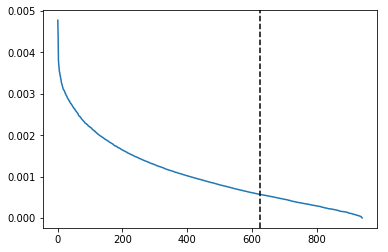

In [24]:
print(len(casts_explained_variance))
# print(casts_explained_variance.cumsum())
k1 = np.argmax(casts_explained_variance.cumsum() > 0.9)
print (k1)
print(sum(casts_explained_variance[:k1+1])*100)

plt.plot(casts_explained_variance) # adjust values to zoom in/out of graph
plt.axvline(x=k1+1, color='k', linestyle='--')
plt.show()

In [25]:
ipca1 = IncrementalPCA(copy=True, n_components=k1, whiten=False) # batch size none
ipca1.fit(X_casts)
X_casts_transformed = ipca1.transform(X_casts)
print(X_casts_transformed.shape)
print(X_casts_transformed)

(22775, 623)
[[-4.20191102e-03  8.04069168e-04 -8.72912718e-05 ...  4.07918810e-04
  -1.07481824e-03 -5.78191893e-05]
 [-4.82894714e-03  1.15438856e-03 -1.06168908e-04 ... -4.66855053e-05
   2.63532753e-05 -4.59794730e-05]
 [ 1.25412367e-02  7.23138679e-03 -1.50860857e-03 ... -7.27452306e-04
   1.86994704e-03  6.09250205e-06]
 ...
 [-4.08956721e-03  7.41303704e-04 -8.39090337e-05 ...  4.89368629e-04
  -1.27211117e-03 -5.99404686e-05]
 [-4.82894714e-03  1.15438856e-03 -1.06168908e-04 ... -4.66855053e-05
   2.63532753e-05 -4.59794730e-05]
 [-4.82894714e-03  1.15438856e-03 -1.06168908e-04 ... -4.66855053e-05
   2.63532753e-05 -4.59794730e-05]]


<h3>Directors</h3>

In [7]:
pca2 = PCA()
pca2.fit_transform(X_directors)
directors_explained_variance = pca2.explained_variance_ratio_
# print(directors_explained_variance)

507
336
90.11073066683709


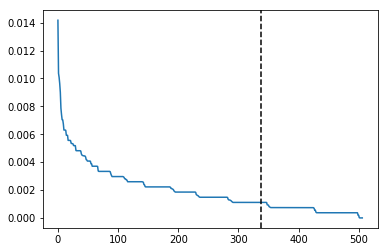

In [8]:
print(len(directors_explained_variance))
# print(directors_explained_variance.cumsum())
k2 = np.argmax(directors_explained_variance.cumsum() > 0.9)
print (k2)
print(sum(directors_explained_variance[:k2+1])*100)

plt.plot(directors_explained_variance) # adjust values to zoom in/out of graph
plt.axvline(x=k2+1, color='k', linestyle='--')
plt.show()

In [9]:
ipca2 = IncrementalPCA(copy=True, n_components=k2, whiten=False) # batch size none
ipca2.fit(X_directors)
X_directors_transformed = ipca2.transform(X_directors)
print(X_directors_transformed.shape)

(22775, 336)


<h3>Genres</h3>

In [10]:
pca3 = PCA()
pca3.fit_transform(X_genres)
genres_explained_variance = pca3.explained_variance_ratio_
# print(genres_explained_variance)

19
13
91.72025791403114


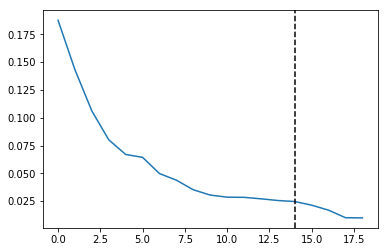

In [11]:
print(len(genres_explained_variance))
# print(genres_explained_variance.cumsum())
k3 = np.argmax(genres_explained_variance.cumsum() > 0.9)
print (k3)
print(sum(genres_explained_variance[:k3+1])*100)

plt.plot(genres_explained_variance) # adjust values to zoom in/out of graph
plt.axvline(x=k3+1, color='k', linestyle='--')
plt.show()

In [12]:
ipca3 = IncrementalPCA(copy=True, n_components=k3, whiten=False) # batch size none
ipca3.fit(X_genres)
X_genres_transformed = ipca3.transform(X_genres)
print(X_genres_transformed.shape)

(23579, 13)


<h3>Overview</h3>
Full overview dataset (commented out)<br>
Most common 5k overview dataset

In [13]:
# pca4 = PCA()
# pca4.fit_transform(X_overview)
# overview_explained_variance = pca4.explained_variance_ratio_
# # print(overview_explained_variance)

pca4_s = PCA()
pca4_s.fit_transform(X_overview_s)
overview_s_explained_variance = pca4_s.explained_variance_ratio_
# print(overview_s_explained_variance)

4996
3038
90.00278946181422


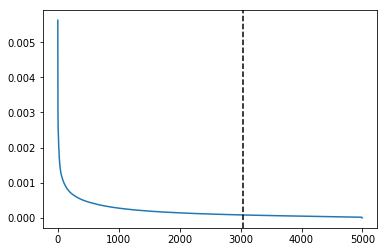

In [14]:
# print(len(overview_explained_variance))
# # print(overview_explained_variance.cumsum())
# k4 = np.argmax(overview_explained_variance.cumsum() > 0.9)
# print (k4)
# print(sum(overview_explained_variance[:k4+1])*100)
# plt.plot(overview_explained_variance) # adjust values to zoom in/out of graph
# plt.axvline(x=k4+1, color='k', linestyle='--')
# plt.show()

print(len(overview_s_explained_variance))
# print(overview_s_explained_variance.cumsum())
k4_s = np.argmax(overview_s_explained_variance.cumsum() > 0.9)
print (k4_s)
print(sum(overview_s_explained_variance[:k4_s+1])*100)
plt.plot(overview_s_explained_variance) # adjust values to zoom in/out of graph
plt.axvline(x=k4_s+1, color='k', linestyle='--')
plt.show()

In [15]:
# ipca4 = IncrementalPCA(copy=True, n_components=k4, whiten=False) # batch size none
# ipca4.fit(X_overview)
# X_overview_transformed = ipca4.transform(X_overview)
# print(X_overview_transformed.shape)

ipca4_s = IncrementalPCA(copy=True, n_components=k4_s, whiten=False) # batch size none
ipca4_s.fit(X_overview_s)
X_overview_s_transformed = ipca4_s.transform(X_overview_s)
print(X_overview_s_transformed.shape)

(23579, 3038)


<h3>Production Companies</h3>

In [16]:
# pca5 = PCA()
# pca5.fit_transform(X_productioncompanies)
# productioncompanies_explained_variance = pca5.explained_variance_ratio_
# # print(productioncompanies_explained_variance)

pca5_s = PCA()
pca5_s.fit_transform(X_productioncompanies_s)
productioncompanies_s_explained_variance = pca5_s.explained_variance_ratio_
# print(productioncompanies_s_explained_variance)

1000
676
90.0147702237606


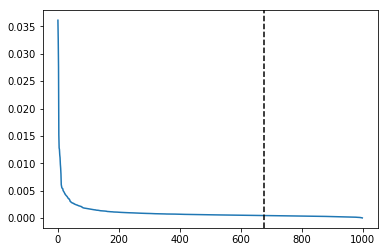

In [17]:
# print(len(productioncompanies_explained_variance))
# # print(productioncompanies_explained_variance.cumsum())
# k5 = np.argmax(productioncompanies_explained_variance.cumsum() > 0.9)
# print (k5)
# print(sum(productioncompanies_explained_variance[:k5+1])*100)
# plt.plot(productioncompanies_explained_variance) # adjust values to zoom in/out of graph
# plt.axvline(x=k5+1, color='k', linestyle='--')
# plt.show()

print(len(productioncompanies_s_explained_variance))
# print(productioncompanies_s_explained_variance.cumsum())
k5_s = np.argmax(productioncompanies_s_explained_variance.cumsum() > 0.9)
print (k5_s)
print(sum(productioncompanies_s_explained_variance[:k5_s+1])*100)
plt.plot(productioncompanies_s_explained_variance) # adjust values to zoom in/out of graph
plt.axvline(x=k5_s+1, color='k', linestyle='--')
plt.show()

In [18]:
# ipca5 = IncrementalPCA(copy=True, n_components=k5, whiten=False) # batch size none
# ipca5.fit(X_productioncompanies)
# X_productioncompanies_transformed = ipca5.transform(X_productioncompanies)
# print(X_productioncompanies_transformed.shape)

ipca5_s = IncrementalPCA(copy=True, n_components=k5_s, whiten=False) # batch size none
ipca5_s.fit(X_productioncompanies_s)
X_productioncompanies_s_transformed = ipca5_s.transform(X_productioncompanies_s)
print(X_productioncompanies_s_transformed.shape)

(23579, 676)


### Combine PCA Results

In [20]:
dfnum = pd.read_pickle("explored_data")
dfnum = dfnum.replace([np.inf, -np.inf, np.nan], 0) #removing infinite/nan values
print(dfnum.columns.values)
print(dfnum.shape)

# Convert PCA results to dataframes
dfcasts_t = pd.DataFrame(X_casts_transformed)
dfcasts_t.columns = ["casts_" + str(i) for i in range(k1)]
print(dfcasts_t.shape)

dfdirectors_t = pd.DataFrame(X_directors_transformed)
dfdirectors_t.columns = ["directors_" + str(i) for i in range(k2)]
print(dfdirectors_t.shape)

dfgenres_t = pd.DataFrame(X_genres_transformed)
dfgenres_t.columns = ["genres_" + str(i) for i in range(k3)]
print(dfgenres_t.shape)

# dfoverview_t = pd.DataFrame(X_overview_transformed)
# dfoverview_t.columns = ["overview_" + str(i) for i in range(k4)]
# print(dfoverview_t.shape)

dfoverview_s_t = pd.DataFrame(X_overview_s_transformed)
dfoverview_s_t.columns = ["overview_s_" + str(i) for i in range(k4_s)]
print(dfoverview_s_t.shape)

# dfproductioncompanies_t = pd.DataFrame(X_productioncompanies_transformed)
# dfproductioncompanies_t.columns = ["productioncompanies_" + str(i) for i in range(k5)]
# print(dfproductioncompanies_t.shape)

dfproductioncompanies_s_t = pd.DataFrame(X_productioncompanies_s_transformed)
dfproductioncompanies_s_t.columns = ["productioncompanies_s_" + str(i) for i in range(k5_s)]
print(dfproductioncompanies_s_t.shape)

# Combine all dataframes - MEMORY ERROR
# final_df = pd.concat([id_col, dfcasts_t, dfdirectors_t, dfgenres_t, dfoverview_s_t, dfproductioncompanies_s_t])
final_df = pd.concat([id_col, dfcasts_t, dfdirectors_t, dfgenres_t])
print(final_df.columns.values)
final_df["id"] = pd.to_numeric(final_df["id"])
print(final_df.shape) # ? cols disappeared?
final_df = pd.merge(dfnum, final_df, on='id', how='left')
final_df = final_df.replace([np.inf, -np.inf, np.nan], 0) #removing infinite/nan values

# Check the columns using dtypes
print(final_df.dtypes)

# Randomly sample 5 records with .sample(5)
print(final_df.sample(5))
print(final_df.shape)

['budget' 'revenue' 'weekday' 'day' 'month' 'year' 'runtime'
 'vote_average' 'vote_count' 'weighted_rating' 'id' 'log_revenue'
 'log_budget' 'log_runtime' 'log_vote_average' 'log_vote_count'
 'log_weighted_rating' 'bin']
(19560, 18)
(22775, 623)
(22775, 336)
(23579, 13)
(23579, 3038)
(23579, 676)
['casts_0' 'casts_1' 'casts_10' 'casts_100' 'casts_101' 'casts_102'
 'casts_103' 'casts_104' 'casts_105' 'casts_106' 'casts_107' 'casts_108'
 'casts_109' 'casts_11' 'casts_110' 'casts_111' 'casts_112' 'casts_113'
 'casts_114' 'casts_115' 'casts_116' 'casts_117' 'casts_118' 'casts_119'
 'casts_12' 'casts_120' 'casts_121' 'casts_122' 'casts_123' 'casts_124'
 'casts_125' 'casts_126' 'casts_127' 'casts_128' 'casts_129' 'casts_13'
 'casts_130' 'casts_131' 'casts_132' 'casts_133' 'casts_134' 'casts_135'
 'casts_136' 'casts_137' 'casts_138' 'casts_139' 'casts_14' 'casts_140'
 'casts_141' 'casts_142' 'casts_143' 'casts_144' 'casts_145' 'casts_146'
 'casts_147' 'casts_148' 'casts_149' 'casts_15' 'casts

budget                 float64
revenue                float64
weekday                float64
day                    float64
month                  float64
year                   float64
runtime                float64
vote_average           float64
vote_count             float64
weighted_rating        float64
id                     float64
log_revenue            float64
log_budget             float64
log_runtime            float64
log_vote_average       float64
log_vote_count         float64
log_weighted_rating    float64
bin                    float64
casts_0                float64
casts_1                float64
casts_10               float64
casts_100              float64
casts_101              float64
casts_102              float64
casts_103              float64
casts_104              float64
casts_105              float64
casts_106              float64
casts_107              float64
casts_108              float64
                        ...   
directors_84           float64
director

In [21]:
final_df.to_pickle("pca_data")

In [22]:
# TO USE DATAFRAME FILES

test = pd.read_pickle("pca_data")
print(test.columns.values)
print(test.dtypes)
print(test)

['budget' 'revenue' 'weekday' 'day' 'month' 'year' 'runtime'
 'vote_average' 'vote_count' 'weighted_rating' 'id' 'log_revenue'
 'log_budget' 'log_runtime' 'log_vote_average' 'log_vote_count'
 'log_weighted_rating' 'bin' 'casts_0' 'casts_1' 'casts_10' 'casts_100'
 'casts_101' 'casts_102' 'casts_103' 'casts_104' 'casts_105' 'casts_106'
 'casts_107' 'casts_108' 'casts_109' 'casts_11' 'casts_110' 'casts_111'
 'casts_112' 'casts_113' 'casts_114' 'casts_115' 'casts_116' 'casts_117'
 'casts_118' 'casts_119' 'casts_12' 'casts_120' 'casts_121' 'casts_122'
 'casts_123' 'casts_124' 'casts_125' 'casts_126' 'casts_127' 'casts_128'
 'casts_129' 'casts_13' 'casts_130' 'casts_131' 'casts_132' 'casts_133'
 'casts_134' 'casts_135' 'casts_136' 'casts_137' 'casts_138' 'casts_139'
 'casts_14' 'casts_140' 'casts_141' 'casts_142' 'casts_143' 'casts_144'
 'casts_145' 'casts_146' 'casts_147' 'casts_148' 'casts_149' 'casts_15'
 'casts_150' 'casts_151' 'casts_152' 'casts_153' 'casts_154' 'casts_155'
 'casts_156'

<h3>Unused Code</h3>

In [ ]:
# my_df = pd.read_csv('../2. Data Preprocessing/tmdb_All_movies.csv')

# revenue = pd.read_pickle("../2. Data Preprocessing/processed_data")
# revenue.columns = [x[0] for x in revenue.columns]
# revenue = revenue["revenue"] # y
# # print(revenue)
# y = revenue